In [1]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# scrape the mars table
df = pd.read_html(url)
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [15]:
#convert data to dataframe
mars_df = pd.DataFrame(df[0])
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [22]:
# convert data types
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [30]:
# How many months on mars?
print(f"There are {mars_df['month'].max()} months on mars.")

There are 12 months on mars.


In [31]:
# How many martian days of data
print(f"There are {mars_df['sol'].nunique()} martian days of data.")

There are 1867 martian days of data.


It looks like the 3rd month is the coldest on mars, while the 8th month has the higest minimum temperatures.


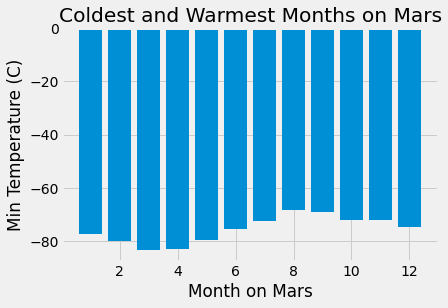

In [101]:
# Monthly Martian Temperatures
group_df = mars_df.groupby("month")
plt.bar(group_df["month"].mean(),group_df["min_temp"].mean(),label="Temperature")
plt.title("Coldest and Warmest Months on Mars")
plt.ylabel("Min Temperature (C)")
plt.xlabel("Month on Mars")
print(f"It looks like the 3rd month is the coldest on mars, while the 8th month has the higest minimum temperatures.")

It looks like the 6th month has the lowest air pressure on mars, while the 9th month has the higest.


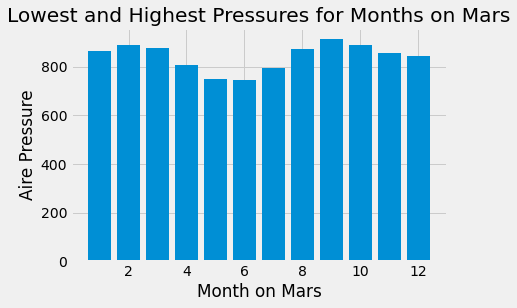

In [100]:
# Monthly Martian air pressures

plt.bar(group_df["month"].mean(),group_df["pressure"].mean(),label="Pressure")
plt.title("Lowest and Highest Pressures for Months on Mars")
plt.ylabel("Aire Pressure")
plt.xlabel("Month on Mars")
print(f"It looks like the 6th month has the lowest air pressure on mars, while the 9th month has the higest.")

It looks the temperatures on mars reach the max and min nearly every 2 earth years, since 2 year has 730 days, and this is a bit less than that, a mars year should be just under 700 earth days.


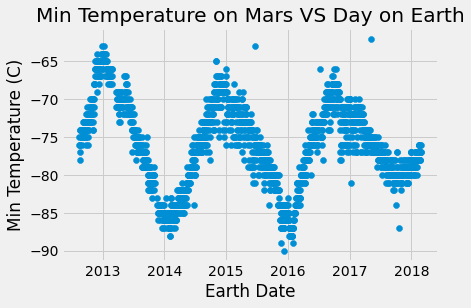

In [102]:
# How many days on Mars
days_df = mars_df.groupby("terrestrial_date")
plt.scatter(days_df["terrestrial_date"].mean(),days_df["min_temp"].mean())
plt.title("Min Temperature on Mars VS Day on Earth")
plt.ylabel("Min Temperature (C)")
plt.xlabel("Earth Date")
print(f"It looks the temperatures on mars reach the max and min nearly every 2 earth years, since 2 year has 730 days, and this is a bit less than that, a mars year should be just under 700 earth days.")


In [103]:
# Create the output file
output_data_file = "Mars_date.csv"
# Export the City_Data into a CSV
mars_df.to_csv(output_data_file)